# Приоритезация гипотез и анализ A/B теста для увеличения выручки крупного интернет-магазина

Совместно с отделом маркетинга был подготовилен список гипотез для увеличения выручки

**Цель:**  
Необходимо приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты  

**Исходные данные:**  
Файлы `hypothesis.csv`, `orders.csv` и `visitors.csv`

<h1>Оглавление<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Открытие-данных" data-toc-modified-id="Открытие-данных"><span class="toc-item-num"></span>Открытие данных</a></span></li><li><span><a href="#Приоритизация-гипотез" data-toc-modified-id="Приоритизация-гипотез"><span class="toc-item-num"></span>Приоритизация гипотез</a></span><ul class="toc-item"><li><span><a href="#ICE" data-toc-modified-id="ICE"><span class="toc-item-num"></span>ICE</a></span></li><li><span><a href="#RICE" data-toc-modified-id="RICE"><span class="toc-item-num"></span>RICE</a></span></li></ul></li><li><span><a href="#Стабильность-кумулятивных-метрик" data-toc-modified-id="Стабильность-кумулятивных-метрик"><span class="toc-item-num"></span>Стабильность кумулятивных метрик</a></span><ul class="toc-item"><li><span><a href="#Кумулятивная-выручка-по-группам" data-toc-modified-id="Кумулятивная-выручка-по-группам"><span class="toc-item-num"></span>Кумулятивная выручка по группам</a></span></li><li><span><a href="#Кумулятивный-средний-чек-по-группам" data-toc-modified-id="Кумулятивный-средний-чек-по-группам"><span class="toc-item-num"></span>Кумулятивный средний чек по группам</a></span></li><li><span><a href="#Относительные-изменения-кумулятивного-среднего-чека-группы-B-к-группе-A" data-toc-modified-id="Относительные-изменения-кумулятивного-среднего-чека-группы-B-к-группе-A"><span class="toc-item-num"></span>Относительные изменения кумулятивного среднего чека группы B к группе A</a></span></li><li><span><a href="#Кумулятивная-конверсия-по-группам" data-toc-modified-id="Кумулятивная-конверсия-по-группам"><span class="toc-item-num"></span>Кумулятивная конверсия по группам</a></span></li><li><span><a href="#Относительные-изменения-кумулятивной-конверсии-группы-B-к-группе-A" data-toc-modified-id="Относительные-изменения-кумулятивной-конверсии-группы-B-к-группе-A"><span class="toc-item-num"></span>Относительные изменения кумулятивной конверсии группы B к группе A</a></span></li></ul></li><li><span><a href="#Анализ-выбросов-и-всплесков" data-toc-modified-id="Анализ-выбросов-и-всплесков"><span class="toc-item-num"></span>Анализ выбросов и всплесков</a></span></li><li><span><a href="#Анализ-A/B-теста" data-toc-modified-id="Анализ-A/B-теста"><span class="toc-item-num"></span>Анализ A/B-теста</a></span><ul class="toc-item"><li><span><a href="#Статистическая-значимость-различия-в-конверсии-и-в-среднем-чеке-между-группами-по-«сырым»-данным" data-toc-modified-id="Статистическая-значимость-различия-в-конверсии-и-в-среднем-чеке-между-группами-по-«сырым»-данным"><span class="toc-item-num"></span>Статистическая значимость различия в конверсии и в среднем чеке между группами по «сырым» данным</a></span></li><li><span><a href="#Статистическая-значимость-различия-в-конверсии-и-в-среднем-чеке-между-группами-по-«очищенным»-данным" data-toc-modified-id="Статистическая-значимость-различия-в-конверсии-и-в-среднем-чеке-между-группами-по-«очищенным»-данным"><span class="toc-item-num"></span>Статистическая значимость различия в конверсии и в среднем чеке между группами по «очищенным» данным</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод"><span class="toc-item-num"></span>Вывод</a></span></li></ul></div>

## Открытие данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

In [2]:
try:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')
    orders = pd.read_csv('/datasets/orders.csv')
    visitors = pd.read_csv('/datasets/visitors.csv')
except:
    hypothesis = pd.read_csv('hypothesis.csv')
    orders = pd.read_csv('orders.csv')
    visitors = pd.read_csv('visitors.csv')

In [3]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [4]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


Пропущенных значений нет, дубликатов таке визуально не наблюдается, тип данных соответствующий. Необходимо только привести названия столбцов к нижнему регистру

In [5]:
hypothesis.columns = hypothesis.columns.str.lower()

In [6]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [8]:
orders.duplicated().sum()

0

Пропущенных значений нет, дубликатов нет. Необходимо скорректировать наименования столбцов и изменить тип данных столбца `date` в datetime64

In [9]:
orders.columns = ['transaction_id', 'visitor_id', 'date', 'revenue', 'group']

In [10]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [11]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [12]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [13]:
visitors.duplicated().sum()

0

Пропущенных значений нет, дубликатов нет. Необходимо изменить тип данных столбца date в datetime64

In [14]:
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

## Приоритизация гипотез

### ICE

Применим фреймворк ICE для приоритизации гипотез. ICE (от англ. impact, confidence, effort / ease «влияние, уверенность, усилия / простота») определяется по формуле: `ICE = (Impact * Confidence) / Effort`  
Все данные известны, необходимо только сделать расчеты

In [15]:
hypothesis['ICE'] = (hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']

In [16]:
pd.set_option('display.max_colwidth', -1)
hypothesis

,hypothesis,reach,impact,confidence,efforts,ICE
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000


In [17]:
hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


На 1 месте 8 гипотеза со значением ICE равным 16.2, далее по уменьшению идут 0 и 7 гипотезы

### RICE

Применим фреймворк RICE для приоритизации гипотез. У метода ICE есть модификация RICE (R от англ. reach, «охват») определяющийся по формуле: `RICE = (Reach * Impact * Confidence) / Effort`  

In [18]:
hypothesis['RICE'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']

In [19]:
hypothesis

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333,4.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2


In [20]:
hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


На 1 месте 7 гипотеза со значением RICE равным 112, далее по уменьшению идут 2, а также 0 и 6 гипотезы на одном уровне

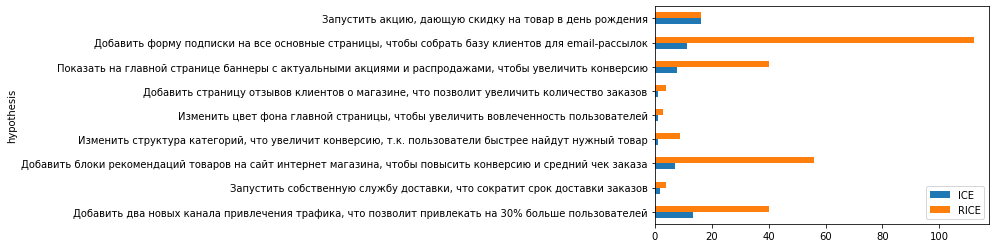

In [21]:
hypothesis.set_index('hypothesis')[['ICE','RICE']].plot(kind='barh');

Показатели ICE и RICE в приоритете определяют разные гипотезы, на это повлиял показатель **reach** - охват пользователей, которых затронет изменение, которое планируется внести. **У гипотезы 7 reach составляет 10 по 10-бальной шкале**, т.е. максимум. **Со 2 гипотезой аналогично показатель reach имеет значение 8**, что также повышает приоритет данной гипотезы.  
А вот у 0 гипотезы, которая состоит в тройке приоритетных по ICE и RICE показатель reach не высок (3), но зато показатели impact и confidence достаточно высокие (10 и 8 соответственно). 

## Стабильность кумулятивных метрик

A/B-тест проведен, проанализируем его результаты, и, начнем с построения графиков кумулятивных метрик 

### Кумулятивная выручка по группам

Создадим массив уникальных пар значений дат и групп теста методом drop_duplicates()

In [22]:
dates_groups = orders[['date', 'group']].drop_duplicates()

Соберём агрегированные кумулятивные по дням данные о заказах.  
Получим строки таблицы orders, дата которых меньше или равна дате элемента из dates_groups, а группа теста равна группе из datesGroups, далее агрегируем значения: 
   * вычислим максимальную дату, максимум группы, 
   * найдём число уникальных ID заказов и пользователей, 
   * подсчитаем сумму средних чеков, 
   * применим методы к каждой строке датафрейма: apply(axis=1),
   * отсортируем результаты по столбцам 'date' и 'group'

In [23]:
orders_agregate = dates_groups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
    .agg({'date':'max', 'group': 'max', 'transaction_id':'nunique', 'visitor_id':'nunique', 'revenue':'sum'}), axis=1).sort_values(by=['date', 'group'])

In [24]:
orders_agregate.head()

,date,group,transaction_id,visitor_id,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874


Аналогично получим агрегированные кумулятивные по дням данные о посетителях интернет-магазина:

In [25]:
visitors_agregate = dates_groups.apply(
    lambda x:visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
    .agg({'date':'max', 'group':'max', 'visitors':'sum'}), axis=1).sort_values(by=['date', 'group'])

In [26]:
visitors_agregate.head()

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


Объединим обе таблицы в одной и скорректируем названия столбов

In [27]:
cumulative_data = pd.merge(orders_agregate, visitors_agregate, on=['date', 'group'])
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [28]:
cumulative_data.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


Построим графики кумулятивной выручки по группам:

In [29]:
cumulative_data_A = cumulative_data[cumulative_data['group'] == 'A']
cumulative_data_B = cumulative_data[cumulative_data['group'] == 'B']

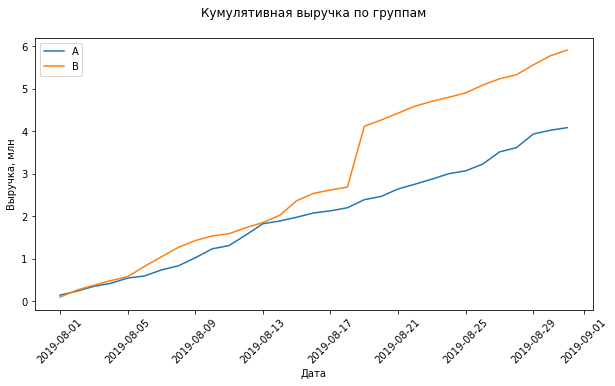

In [30]:
plt.figure(figsize=(10,5))
plt.title('Кумулятивная выручка по группам\n')
plt.xlabel('Дата')
plt.ylabel('Выручка, млн')
plt.xticks(rotation=45)
plt.plot(cumulative_data_A['date'], cumulative_data_A['revenue']/1000000, label='A')
plt.plot(cumulative_data_B['date'], cumulative_data_B['revenue']/1000000, label='B')
plt.legend();

Выручка почти равномерно увеличивается в течение всего теста. Однако график выручки группы B в одной точке резко растёт. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке. Такие выбросы проанализируем позднее.

### Кумулятивный средний чек по группам

Построим график кумулятивного среднего чека по группам. Построим график, аналогичный предыдущему, только вместо выручки найдем средний чек (выручка поделенная на заказы)

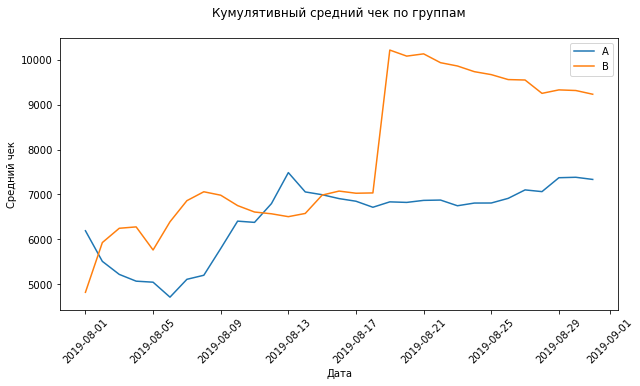

In [31]:
plt.figure(figsize=(10,5))
plt.title('Кумулятивный средний чек по группам\n')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.xticks(rotation=45)
plt.plot(cumulative_data_A['date'], cumulative_data_A['revenue']/cumulative_data_A['orders'], label='A')
plt.plot(cumulative_data_B['date'], cumulative_data_B['revenue']/cumulative_data_B['orders'], label='B')
plt.legend();

Графики не являются равномерными, в течение всего периода наблюдается пересечение графиков. График группы B в середине августа резко вырос, это также может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке. Такие выбросы проанализируем позднее.

### Относительные изменения кумулятивного среднего чека группы B к группе A

Построим график относительно различия кумулятивного среднего чека группы B к группе A. Для этого объединим данные таблиц cumulative_data_A и cumulative_data_B, построим график и добавим горизонтальную ось методом axhline() 

In [32]:
merge_cumulative_data = pd.merge(cumulative_data_A, cumulative_data_B, on='date', how='left', suffixes = ['A', 'B'])

In [33]:
merge_cumulative_data.head()

,date,groupA,ordersA,buyersA,revenueA,visitorsA,groupB,ordersB,buyersB,revenueB,visitorsB
0,2019-08-01,A,24,20,148579,719,B,21,20,101217,713
1,2019-08-02,A,44,38,242401,1338,B,45,43,266748,1294
2,2019-08-03,A,68,62,354874,1845,B,61,59,380996,1803
3,2019-08-04,A,84,77,425699,2562,B,78,75,489567,2573
4,2019-08-05,A,109,100,549917,3318,B,101,98,581995,3280


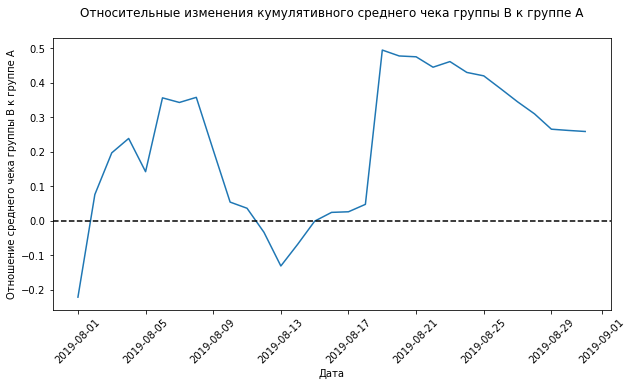

In [34]:
plt.figure(figsize=(10,5))
plt.title('Относительные изменения кумулятивного среднего чека группы B к группе A\n')
plt.xlabel('Дата')
plt.ylabel('Отношение среднего чека группы B к группе A')
plt.xticks(rotation=45)
plt.plot(merge_cumulative_data['date'], (merge_cumulative_data['revenueB']/merge_cumulative_data['ordersB'])/(merge_cumulative_data['revenueA']/merge_cumulative_data['ordersA']) - 1);
plt.axhline(y=0, color='black', linestyle='--');

 Различия между сегментами резко «скачет» на протяжении всего периода, лишь в нескольких точках различия близки к 0. По графику можно понять, что присутствуют крупные заказы и выбросы

### Кумулятивная конверсия по группам

Построим график кумулятивной конверсии по группам. Для этого определим конверсию (отношение числа заказов к числу посетителей). Зададим масштаб осей методом plt.axis(), передадим ему минимальное и максимальное значения оси x; минимальное и максимальное значения оси y

In [35]:
cumulative_data['conversion'] = cumulative_data['orders'] / cumulative_data['visitors']

In [36]:
conversion_data_A = cumulative_data[cumulative_data['group'] == 'A']
conversion_data_B = cumulative_data[cumulative_data['group'] == 'B']

Опеределим границы графика

In [37]:
cumulative_data.describe()

,orders,buyers,revenue,visitors,conversion
count,62.000000,62.000000,6.200000e+01,62.000000,62.000000
mean,317.661290,291.903226,2.464491e+06,9883.306452,0.032292
std,172.828157,157.498031,1.659118e+06,5378.074717,0.002190
min,21.000000,20.000000,1.012170e+05,713.000000,0.029217
25%,177.750000,162.000000,1.096278e+06,5437.500000,0.030190
50%,319.500000,293.500000,2.165968e+06,10030.000000,0.032819
75%,459.250000,421.000000,3.856338e+06,14259.000000,0.034055
max,640.000000,586.000000,5.907760e+06,18916.000000,0.036856


In [38]:
cumulative_data['date'].min()

Timestamp('2019-08-01 00:00:00')

In [39]:
cumulative_data['date'].max()

Timestamp('2019-08-31 00:00:00')

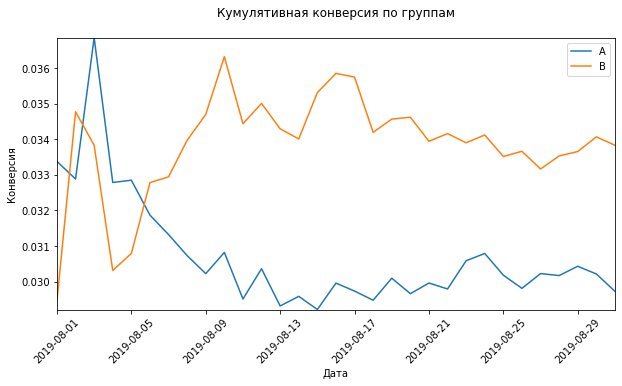

In [40]:
plt.figure(figsize=(10,5))
plt.title('Кумулятивная конверсия по группам\n')
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.xticks(rotation=45)
plt.plot(conversion_data_A['date'], conversion_data_A['conversion'], label='A')
plt.plot(conversion_data_B['date'], conversion_data_B['conversion'], label='B')
plt.legend();
plt.axis(["2019-08-01", "2019-08-31", 0.029217, 0.036856]);

График ассиметричен, первоначально преобладала конверсия группы А, но затем конверсия группы В вырвалась вперёд и зафиксировалась, а конверсия группы А просела и также зафиксировалась.

### Относительные изменения кумулятивной конверсии группы B к группе A

Построим график относительного изменения кумулятивной конверсии группы B к группе A. 

In [41]:
merge_conversion_data = pd.merge(conversion_data_A, conversion_data_B, on=['date'], suffixes=['A', 'B'])

In [42]:
merge_conversion_data.head()

,date,groupA,ordersA,buyersA,revenueA,visitorsA,conversionA,groupB,ordersB,buyersB,revenueB,visitorsB,conversionB
0,2019-08-01,A,24,20,148579,719,0.033380,B,21,20,101217,713,0.029453
1,2019-08-02,A,44,38,242401,1338,0.032885,B,45,43,266748,1294,0.034776
2,2019-08-03,A,68,62,354874,1845,0.036856,B,61,59,380996,1803,0.033833
3,2019-08-04,A,84,77,425699,2562,0.032787,B,78,75,489567,2573,0.030315
4,2019-08-05,A,109,100,549917,3318,0.032851,B,101,98,581995,3280,0.030793


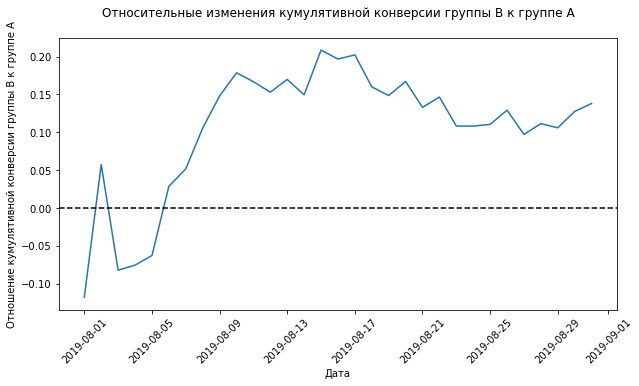

In [43]:
plt.figure(figsize=(10,5))
plt.title('Относительные изменения кумулятивной конверсии группы B к группе A\n')
plt.xlabel('Дата')
plt.ylabel('Отношение кумулятивной конверсии группы B к группе A')
plt.xticks(rotation=45)
plt.plot(merge_conversion_data['date'], (merge_conversion_data['conversionB']/(merge_conversion_data['conversionA']) - 1));
plt.axhline(y=0, color='black', linestyle='--');

В начале теста группа B частично проигрывала группе A, затем вырвалась вперёд. Потом её конверсия снова падала, но теперь постепенно растёт. В целом отношение конверсии ещё не установилось, и сейчас делать какие-либо выводы по тесту нельзя. Впрочем, сперва стоит проанализировать аномалии, возможно, они изменят картину

## Анализ выбросов и всплесков

Рассмотрим подробнее аномалии, которые могут искажать результаты A/B-теста. Построим график количества заказов по пользователям. Для этого сначала подготовим данные, оставим только нужные столбцы

In [44]:
orders_by_users = (
    orders.drop(['date', 'revenue', 'group'], axis=1)
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id':pd.Series.nunique})
)

In [45]:
orders_by_users.columns = ['user_id', 'orders']

In [46]:
orders_by_users.sort_values(by='orders', ascending=False).head(10)

,user_id,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


Наибольшее количество заказов, сделанных одним пользователем = 11, по уменьшению также 9, 8 и 5 заказов. Построим гистрограмму распределения количества заказов на одного пользователя

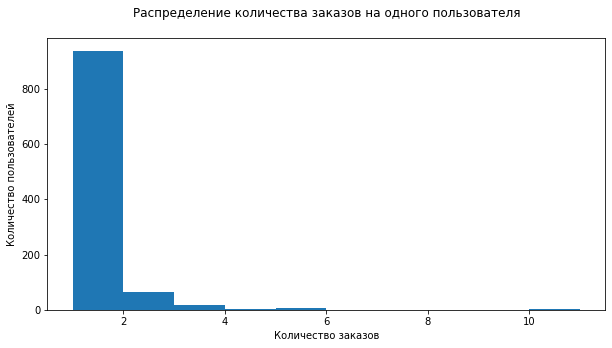

In [47]:
plt.figure(figsize=(10,5))
plt.ylabel('Количество пользователей')
plt.xlabel('Количество заказов')
plt.title('Распределение количества заказов на одного пользователя\n')
plt.hist(orders_by_users['orders']);
plt.show()

Большинство пользователей сделали по 1-2 заказа, намного меньше по 3-4 заказа и совсем небольшое от 5 до 11. Посмотрим на распределение с помощью точечной диаграммы

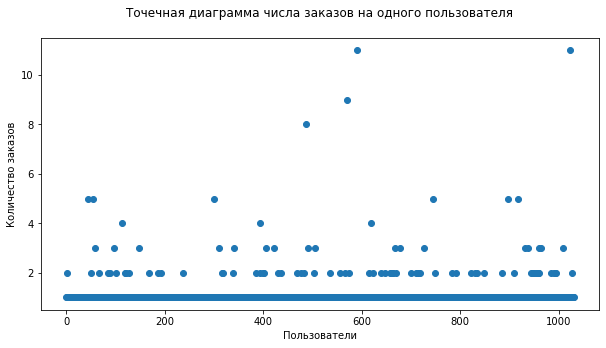

In [48]:
x_values = pd.Series(range(0,len(orders_by_users)))
plt.figure(figsize=(10,5))
plt.ylabel('Количество заказов')
plt.xlabel('Пользователи')
plt.title('Точечная диаграмма числа заказов на одного пользователя\n')
plt.scatter(x_values, orders_by_users['orders']);

Посмотрев на данные с другой стороны можно увидеть, что большинство делают 1 или 2 заказа, 3 заказа сделали порядка 20 пользователей из 1031, а 4 заказа уже 3 пользователя. Количество пользователей, совершивших более 5 заказов всего 4 - педварительно, это и есть аномалии, но точно мжно сказать, определив 95 и 99 перцентили значений. 

In [49]:
np.percentile(orders_by_users['orders'], [95,99])

array([2., 4.])

То есть, примерно 5% пользователей сделали больше 2 заказов, и 1% пользователей сделали больще 4 заказов.  
Разумно выбрать 2 заказа на одного пользователя за нижнюю границу числа заказов, и отсеять аномальных пользователей по ней. 

Поищем аномально дорогие заказы, для этого построим распределение стоимости заказов

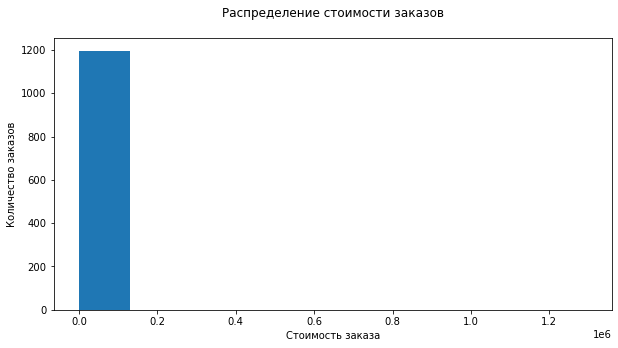

In [50]:
plt.figure(figsize=(10,5))
plt.ylabel('Количество заказов')
plt.xlabel('Стоимость заказа')
plt.title('Распределение стоимости заказов\n')
plt.hist(orders['revenue']);

По гистограмме видно, что большинство заказом имеют низкую стоимость, но из-за наличия больших стоимостей заказов гистограмма плохо читабельна. Построим точечную диаграмму

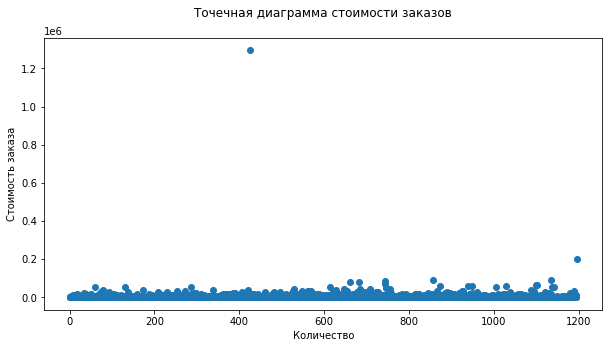

In [51]:
x_values = pd.Series(range(0,len(orders)))
plt.figure(figsize=(10,5))
plt.ylabel('Стоимость заказа')
plt.xlabel('Количество')
plt.title('Точечная диаграмма стоимости заказов\n')
plt.scatter(x_values, orders['revenue']);

На точечной диаграмме уже видны явняе аномалии - один заказ на сумму более 1.2 млн, является ли заказ на сумму около 200 тыс. можно понять, опеределив 95 и 99 перцентили

In [52]:
np.percentile(orders['revenue'], [95,99])

array([28000. , 58233.2])

Не более 5% заказов дороже 28000 рублей и не более 1% дороже 58233.2 рублей. Определим нижнюю границу стоимости заказов равной 28000р. Предполагаемые аномалии действительно являются аномалиями

## Анализ A/B-теста

Ранее мы рассмотрели результаты A/B-теста визуально и выяснили, что в данных, скорее всего, есть выбросы. Увидели выбросы и нашли границу для их определения.  
Посчитаем статистическую значимость различий в конверсии и среднем чеке между группами по «сырым» данным — без удаления аномальных пользователей

Шаг 1. Определим количество пользователей группы А в день

In [53]:
visitors_A_daily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitors_A_daily.columns = ['date', 'visitors_per_date_A']

In [54]:
visitors_A_daily.head()

,date,visitors_per_date_A
0,2019-08-01,719
1,2019-08-02,619
2,2019-08-03,507
3,2019-08-04,717
4,2019-08-05,756


Шаг 1.1. Определим количество пользователей группы В в день

In [55]:
visitors_B_daily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitors_B_daily.columns = ['date', 'visitors_per_date_B']

In [56]:
visitors_B_daily.head()

,date,visitors_per_date_B
31,2019-08-01,713
32,2019-08-02,581
33,2019-08-03,509
34,2019-08-04,770
35,2019-08-05,707


Шаг 2. Определим кумулятивное количество пользователей группы А в день

In [57]:
visitors_A_cummulative = visitors_A_daily.apply(
    lambda x: visitors_A_daily[visitors_A_daily['date'] <= x['date']]
    .agg({'date': 'max', 'visitors_per_date_A': 'sum'}), axis=1,
)
visitors_A_cummulative.columns = ['date', 'visitors_cummulative_A']

In [58]:
visitors_A_cummulative.head()

,date,visitors_cummulative_A
0,2019-08-01,719
1,2019-08-02,1338
2,2019-08-03,1845
3,2019-08-04,2562
4,2019-08-05,3318


Шаг 2.1. Определим кумулятивное количество пользователей группы B в день

In [59]:
visitors_B_cummulative = visitors_B_daily.apply(
    lambda x: visitors_B_daily[visitors_B_daily['date'] <= x['date']]
    .agg({'date': 'max', 'visitors_per_date_B': 'sum'}), axis=1,
)
visitors_B_cummulative.columns = ['date', 'visitors_cummulative_B']

In [60]:
visitors_B_cummulative.head()

,date,visitors_cummulative_B
31,2019-08-01,713
32,2019-08-02,1294
33,2019-08-03,1803
34,2019-08-04,2573
35,2019-08-05,3280


Аналогично определим ежедневное количество заказов и кумулятивное значение

Шаг 3. Определим количество заказов и суммарную выручку группы А в день

In [61]:
orders_A_daily = (orders[orders['group'] == 'A'][['date', 'transaction_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id':pd.Series.nunique, 'revenue':'sum'})
    )
orders_A_daily.columns = ['date', 'orders_per_date_A', 'revenue_per_date_A']

In [62]:
orders_A_daily.head()

,date,orders_per_date_A,revenue_per_date_A
0,2019-08-01,24,148579
1,2019-08-02,20,93822
2,2019-08-03,24,112473
3,2019-08-04,16,70825
4,2019-08-05,25,124218


Шаг 3.1. Определим количество заказов и суммарную выручку группы B в день

In [63]:
orders_B_daily = (orders[orders['group'] == 'B'][['date', 'transaction_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id':pd.Series.nunique, 'revenue':'sum'})
    )
orders_B_daily.columns = ['date', 'orders_per_date_B', 'revenue_per_date_B']

In [64]:
orders_B_daily.head()

,date,orders_per_date_B,revenue_per_date_B
0,2019-08-01,21,101217
1,2019-08-02,24,165531
2,2019-08-03,16,114248
3,2019-08-04,17,108571
4,2019-08-05,23,92428


Шаг 4. Определим кумулятивное количество заказов и суммарную выручку группы А в день

In [65]:
orders_A_cummulative = orders_A_daily.apply(
    lambda x: orders_A_daily[orders_A_daily['date'] <= x['date']]
    .agg({'date':'max', 'orders_per_date_A':'sum', 'revenue_per_date_A':'sum'}), axis=1)
orders_A_cummulative.columns = ['date', 'orders_cummulative_A', 'revenue_cummulative_A']

In [66]:
orders_A_cummulative.head()

,date,orders_cummulative_A,revenue_cummulative_A
0,2019-08-01,24,148579
1,2019-08-02,44,242401
2,2019-08-03,68,354874
3,2019-08-04,84,425699
4,2019-08-05,109,549917


Шаг 4.1. Определим кумулятивное количество заказов и суммарную выручку группы B в день

In [67]:
orders_B_cummulative = orders_B_daily.apply(
    lambda x: orders_B_daily[orders_B_daily['date'] <= x['date']]
    .agg({'date':'max', 'orders_per_date_B':'sum', 'revenue_per_date_B':'sum'}), axis=1)
orders_B_cummulative.columns = ['date', 'orders_cummulative_B', 'revenue_cummulative_B']

In [68]:
orders_B_cummulative.head()

,date,orders_cummulative_B,revenue_cummulative_B
0,2019-08-01,21,101217
1,2019-08-02,45,266748
2,2019-08-03,61,380996
3,2019-08-04,78,489567
4,2019-08-05,101,581995


Шаг 5. Объединим найденные данные в одну таблицу

In [69]:
data = (orders_A_daily
    .merge(orders_B_daily, left_on='date', right_on='date', how='left')
    .merge(orders_A_cummulative, left_on='date', right_on='date', how='left')
    .merge(orders_B_cummulative, left_on='date', right_on='date', how='left')
    .merge(visitors_A_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_B_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_A_cummulative, left_on='date', right_on='date', how='left')
    .merge(visitors_B_cummulative, left_on='date', right_on='date', how='left')
)

In [70]:
data.head()

,date,orders_per_date_A,revenue_per_date_A,orders_per_date_B,revenue_per_date_B,orders_cummulative_A,revenue_cummulative_A,orders_cummulative_B,revenue_cummulative_B,visitors_per_date_A,visitors_per_date_B,visitors_cummulative_A,visitors_cummulative_B
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


### Статистическая значимость различия в конверсии и в среднем чеке между группами по «сырым» данным

Посчитаем статистическую значимость различия в конверсии между группами по «сырым» данным

Создадим переменные orders_by_users_A и orders_by_users_B со столбцами ['visitor_id', 'orders']. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов

In [71]:
orders_by_users_A = (orders[orders['group']=='A']
                     .groupby('visitor_id', as_index=False)
                     .agg({'transaction_id':pd.Series.nunique})
                    )
orders_by_users_A.columns = ['visitor_id', 'orders']

In [72]:
orders_by_users_A.head()

,visitor_id,orders
0,8300375,1
1,11685486,1
2,54447517,1
3,66685450,1
4,78758296,1


In [73]:
orders_by_users_B = (orders[orders['group']=='B']
                     .groupby('visitor_id', as_index=False)
                     .agg({'transaction_id':pd.Series.nunique})
                    )
orders_by_users_B.columns = ['visitor_id', 'orders']

In [74]:
orders_by_users_B.head()

,visitor_id,orders
0,5114589,1
1,6958315,1
2,8300375,1
3,39475350,1
4,47206413,1


Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.  
Объединим последовательности функцией pd.concat(). Сперва ей передают то, что объединяют — в нашем случае список из первой и второй части, дальше передадим аргумент, сообщающий, что объекты Series нужно объединить по строкам (то есть записать подряд): pd.concat([...], axis=0). То же делаем для sampleB и получаем

In [75]:
sample_A = pd.concat([orders_by_users_A['orders'],pd.Series(0, index=np.arange(data['visitors_per_date_A'].sum() - len(orders_by_users_A['orders'])), name='orders')],axis=0)

sample_B = pd.concat([orders_by_users_B['orders'],pd.Series(0, index=np.arange(data['visitors_per_date_B'].sum() - len(orders_by_users_B['orders'])), name='orders')],axis=0) 

In [76]:
sample_A.head()

0    1
1    1
2    1
3    1
4    1
Name: orders, dtype: int64

In [77]:
sample_B.head()

0    1
1    1
2    1
3    1
4    1
Name: orders, dtype: int64

Определим гипотезы:  
H₀ - статистически значимых различий в конверсии между группами нет, тогда альтернативной гипотезой H₁ будет: статистически значимые различия в конверсии между группами есть

In [78]:
print("{0:.3f}".format(stats.mannwhitneyu(sample_A, sample_B)[1], alternative="two-sided"))

0.008


**p-value = 0.008** меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем. 

Число элементов sampleA — это количество пользователей, сумма всех элементов — количество заказов. Чтобы получить конверсию в группе, поделим сумму заказов на число пользователей — найдём среднее в выборке sample_A методом mean(). Аналогично найдём конверсию группы B: sample_B.mean()

In [79]:
print("{0:.3f}".format(sample_B.mean() / sample_A.mean() - 1))

0.138


**Относительный проигрыш группы B равен 13.8%**

Чтобы рассчитать статистическую значимость различий в среднем чеке между сегментами, передадим критерию mannwhitneyu() данные о выручке с заказов. А ещё найдём относительные различия в среднем чеке между группами

Определим гипотезы:
H₀ - статистически значимых различий в среднем чеке между группами нет, тогда альтернативной гипотезой H₁ будет: статистически значимые различия в среднем чеке между группами есть

In [80]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1], alternative="two-sided"))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

0.365
0.259


**p-value = 0.365** больше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем чеке между группами нет, не отвергаем. Впрочем, **средний чек группы B значительно выше среднего чека группы A**

### Статистическая значимость различия в конверсии и в среднем чеке между группами по «очищенным» данным

Найденные 95-й и 99-й перцентили средних чеков равны 28000 и 58233.2 рублям. А 95-й и 99-й перцентили количества заказов на одного пользователя равны 2 и 4 заказа на пользователя.  
Примем за аномальных пользователей тех, кто совершил от 3 заказов или совершил заказ дороже 28 000 рублей. Так мы уберём от 1% до 5% пользователей с наибольшим числом заказов и 5% пользователей с дорогими заказами. Сделаем срезы пользователей с числом заказов больше 2 — users_with_many_orders и пользователей, совершивших заказы дороже 28 000 — users_with_expensive_orders. Объединим их в таблице abnormal_users.

In [81]:
users_with_many_orders = pd.concat(
    [
        orders_by_users_A[orders_by_users_A['orders'] > 2]['visitor_id'],
        orders_by_users_B[orders_by_users_B['orders'] > 2]['visitor_id'],
    ],
    axis=0,)

In [82]:
users_with_many_orders.head()

18     199603092 
23     237748145 
68     611059232 
146    1230306981
189    1614305549
Name: visitor_id, dtype: int64

In [83]:
users_with_expensive_orders = orders[orders['revenue'] > 28000]['visitor_id']

In [84]:
users_with_expensive_orders.head()

60     4256040402
73     2947100995
77     787824685 
78     3288820196
131    2254586615
Name: visitor_id, dtype: int64

In [85]:
abnormal_users = (
    pd.concat([users_with_many_orders, users_with_expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values()
)

In [86]:
abnormal_users

1099    148427295 
18      199603092 
928     204675465 
23      237748145 
37      249864742 
          ...     
723     4009017467
627     4120364173
743     4133034833
499     4256040402
662     4266935830
Name: visitor_id, Length: 74, dtype: int64

Получилось 74 аномальных пользователя.  
Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в конверсии между группами теста по очищенным данным. 

In [87]:
sample_A_filtered = pd.concat(
    [orders_by_users_A[np.logical_not(orders_by_users_A['visitor_id'].isin(abnormal_users))]['orders'],
        pd.Series(0, index=np.arange(data['visitors_per_date_A'].sum() - len(orders_by_users_A['orders'])),
            name='orders',),], axis=0,)

In [88]:
sample_A_filtered.head()

0    1
1    1
2    1
3    1
4    1
Name: orders, dtype: int64

In [89]:
sample_B_filtered = pd.concat(
    [orders_by_users_B[np.logical_not(orders_by_users_B['visitor_id'].isin(abnormal_users))]['orders'],
        pd.Series(0, index=np.arange(data['visitors_per_date_B'].sum() - len(orders_by_users_B['orders'])),
            name='orders',),], axis=0,)

In [90]:
sample_B_filtered.head()

0    1
1    1
2    1
3    1
4    1
Name: orders, dtype: int64

Применим статистический критерий Манна-Уитни к полученным выборкам. Определим гипотезы:  
H₀ - статистически значимых различий в конверсии между группами нет, тогда альтернативной гипотезой H₁ будет: статистически значимые различия в конверсии между группами есть

In [91]:
print('{0:.3f}'.format(stats.mannwhitneyu(sample_A_filtered, sample_B_filtered)[1], alternative="two-sided"))
print('{0:.3f}'.format(sample_B_filtered.mean()/sample_A_filtered.mean()-1)) 

0.007
0.173


Результаты по конверсии практически не изменились, посмотрим на результаты по среднему чеку.  
Определим гипотезы: H₀ - статистически значимых различий в среднем чеке между группами нет, тогда альтернативной гипотезой H₁ будет: статистически значимые различия в среднем чеке между группами есть

In [92]:
print('{0:.3f}'.format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group'] == 'A',
        np.logical_not(orders['visitor_id'].isin(abnormal_users)),
    )]['revenue'],
    orders[np.logical_and(
        orders['group'] == 'B',
        np.logical_not(orders['visitor_id'].isin(abnormal_users)),
    )]['revenue'],)[1], alternative="two-sided"))

0.369


In [93]:
print("{0:.3f}".format(orders[np.logical_and(
        orders['group'] == 'B',
        np.logical_not(orders['visitor_id'].isin(abnormal_users)),
        )]['revenue'].mean()
    / orders[np.logical_and(
        orders['group'] == 'A',
        np.logical_not(orders['visitor_id'].isin(abnormal_users)),
        )]['revenue'].mean()
        - 1))

-0.020


Результаты p-value по среднему чеку также практически не изменились, нулевую гипотезу о том, что статистически значимых различий в среднем чеке между группами нет, не отвергаем. НО, средний чек группы B стал ниже среднего чека группы A.

Сформулируем выводы и имеющиеся факты:  
   * статистически значимые различия по конверсии между группами по «сырым» и по данным после фильтрации аномалий присутствуют;
   * нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;
   * график различия конверсии между группами сообщает, что результаты группы B значительно лучше группы A
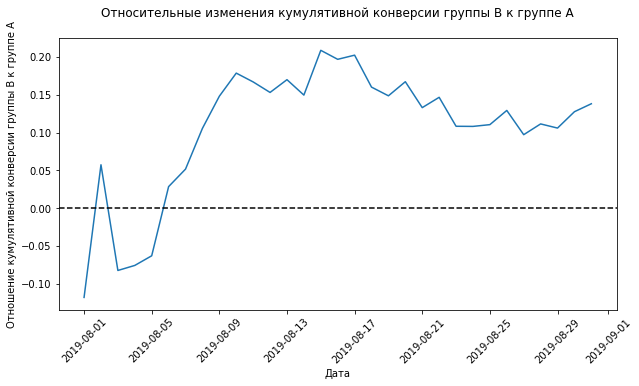
  


   * график различия среднего чека говорит о том, что результаты группы B ухудшаются день ото дня, но сейчас почти на 30% лучше
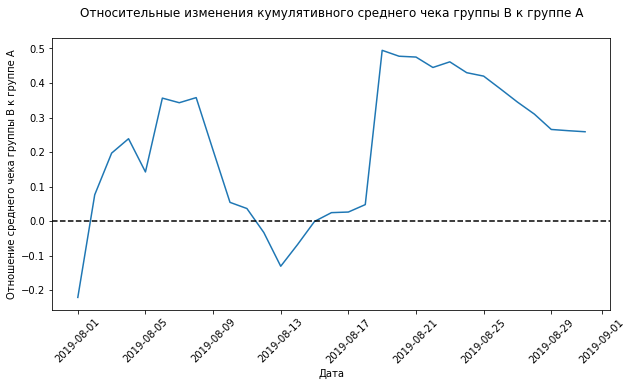

Исходя из обнаруженных фактов, тест следует остановить и признать его успешным в случае, если нам достаточно улучшения метрики - конверсии. Если важно добиться улучшения двух метрик (конверсия и средний чек), то тест следует остановить и признать неуспешным, так как маловероятно, что в рамках теста мы добьемся статистически значимого различия по среднему чеку между группами.  
Показатели прежде всего определяются целью проекта - в данном случае это увеличение выручки. Для более полного понимания о значимости той или иной метрики рекомендуется дополнительно пообщаться с заказчиком, либо представить два варианта событий на выбор. 

## Вывод

В рамках днной работы были:  
   * применен фреймворк ICE для приоритезации гипотез. На 1 месте оказалась гипотеза №8 **Запустить акцию, дающую скидку на товар в день рождения** со значением ICE равным 16.2, далее по уменьшению идут 0 и 7 гипотезы
   * применен фреймворк RICE для приоритизации гипотез. На 1 месте оказалась гипотеза №7 **Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок** со значением RICE равным 112, далее по уменьшению идут 2, а также 0 и 6 гипотезы на одном уровне  
  
Показатели ICE и RICE в приоритете определяют разные гипотезы, на это повлиял показатель reach - охват пользователей, которых затронет изменение, которое планируется внести  
  
  
   * проанализирована стабильность кумулятивных метрик:
      - Выручка почти равномерно увеличивается в течение всего теста. Однако график выручки группы B в одной точке резко растёт. Это первый сигнал, говорящий о наличии всплеска числа заказов, либо о появлении очень дорогих заказов в выборке.
      - Графики среднего чека не являются равномерными, в течение всего периода наблюдается пересечение графиков группы А и В. График группы B в середине августа резко вырос, это также может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке. 
      - График конверсий ассиметричен, первоначально преобладала конверсия группы А, но затем конверсия группы В вырвалась вперёд и зафиксировалась, а конверсия группы А просела и также зафиксировалась.
      - Относительные различия среднего чека между группами резко «скачет» на протяжении всего периода, лишь в нескольких точках различия близки к 0. По графику можно понять, что присутствуют крупные заказы и выбросы
      - Относительные изменения кумулятивной конверсии отражена в том, что в начале теста группа B частично проигрывала группе A, затем вырвалась вперёд. Потом её конверсия снова падала, но затем постепенно растёт. 
   * проанализированы аномалии и всплески, определены нижник границы допустимых значений: 95-й и 99-й перцентили средних чеков равны 28000 и 58233.2 рублям, 95-й и 99-й перцентили количества заказов на одного пользователя равны 2 и 4 заказа на пользователя. За аномальных пользователей были приняты те, кто совершил от 3 заказов или совершил заказ дороже 28 000 рублей. Таким образом мы убрали от 1% до 5% пользователей с наибольшим числом заказов и 5% пользователей с дорогими заказами. 
   * провели анализ A/B теста:
      - статистически значимые различия по конверсии между группами по «сырым» и по данным после фильтрации аномалий присутствуют
      - нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий
      - тест следует остановить и признать его успешным в случае, если нам достаточно улучшения метрики - конверсии. Если важно добиться улучшения двух метрик (конверсия и средний чек), то тест следует остановить и признать неуспешным, так как маловероятно, что в рамках теста мы добьемся статистически значимого различия по среднему чеку между группами.